In [1]:
# Step 0: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Step 1: Generate simulated data
np.random.seed(42)
X = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=120000)
Y = (2 * (((2 * (np.cos(X) ** 2)) - 1) ** 2)) - 1

In [3]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [4]:
# Step 2: Define a function to create neural network model
def create_model(num_hidden_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=1, activation='relu'))

    for _ in range(num_hidden_layers-1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [7]:
# Step 3: Train neural networks with different configurations
num_hidden_layers_list = [1, 2, 3]
num_neurons_list = [8, 16, 32]
error = []

for num_hidden_layers in num_hidden_layers_list:
    for num_neurons in num_neurons_list:
        # Create and train the model
        model = create_model(num_hidden_layers, num_neurons)
        model.fit(X_train, Y_train, epochs = 10, batch_size=2100, verbose=0)

        # Make predictions on the test set
        Y_pred = model.predict(X_test)

        # Calculate mean squared error
        mse = mean_squared_error(Y_test, Y_pred)
        error.append(mse)
        

1875/1875 [==============================] - 3s 1ms/step


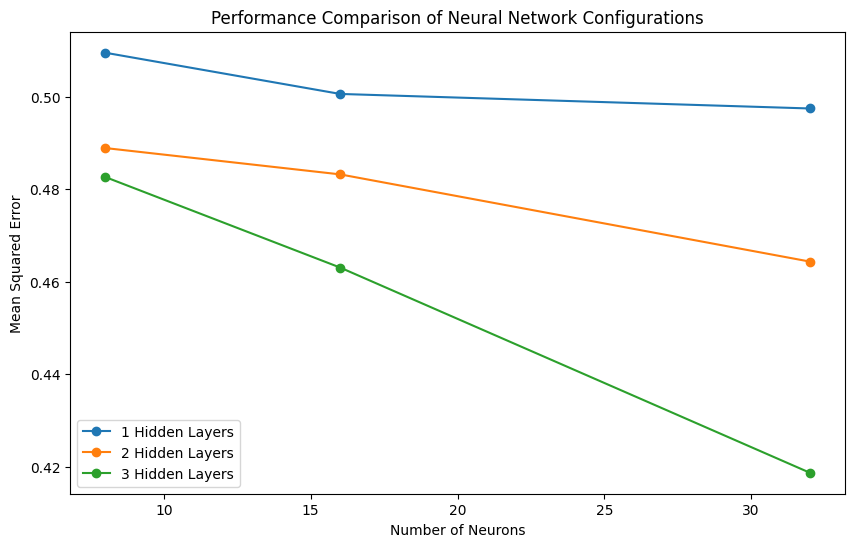

In [8]:
# Plot errors for different configurations
plt.figure(figsize=(10, 6))
for i, num_hidden_layers in enumerate(num_hidden_layers_list):
    plt.plot(num_neurons_list, error[i * len(num_neurons_list): (i + 1) * len(num_neurons_list)], marker='o',
             label=f'{num_hidden_layers} Hidden Layers')

plt.xlabel('Number of Neurons')
plt.ylabel('Mean Squared Error')
plt.title('Performance Comparison of Neural Network Configurations')
plt.legend()
plt.show()